## Somnath
- Mob: 8826050399
- Email: ss.som1997@gmail.com
- Machine Learning Morning Batch 


**Have a look at our hypothetical web startup, MLAAS, which sells the service of providing machine learning algorithms via HTTP. With the increasing success of our company, the demand for better infrastructure also increases to serve all incoming web requests successfully. We don't want to allocate too many resources as that would be too costly. On the other hand, we will lose money if we have not reserved enough resources for serving all incoming requests. The question now is, when will we hit the limit of our current infrastructure, which we estimated being 100,000 requests per hour. We would like to know in advance when we have to request additional servers in the cloud to serve all the incoming requests successfully without paying for unused ones.**

**Regression model for above problem statement: **

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
dataset = pd.read_csv('C:/Users/Som/Desktop/Datasets/web_traffic.tsv', delimiter='\t',header = None,)
dataset.columns = ['Hours','Hits']
dataset.head()

,Hours,Hits
0,1,2272.0
1,2,NaN
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
Hours    743 non-null int64
Hits     735 non-null float64
dtypes: float64(1), int64(1)
memory usage: 11.7 KB


In [5]:
dataset = dataset.dropna(axis=0)
dataset.head()

,Hours,Hits
0,1,2272.0
2,3,1386.0
3,4,1365.0
4,5,1488.0
5,6,1337.0


In [6]:
x = dataset.iloc[:,0:1].values 
y = dataset.iloc[:,-1].values 
x.shape, y.shape

((735, 1), (735,))

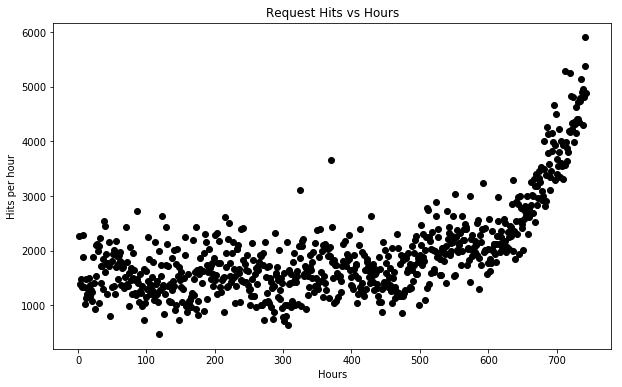

In [7]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='black')
plt.xlabel('Hours')
plt.ylabel('Hits per hour')
plt.title('Request Hits vs Hours')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_pred = model.predict(x)
y_pred

array([ 991.62106319,  996.81344744,  999.40963957, 1002.0058317 ,
       1004.60202383, 1007.19821595, 1009.79440808, 1012.39060021,
       1014.98679234, 1017.58298447, 1020.17917659, 1022.77536872,
       1025.37156085, 1027.96775298, 1030.5639451 , 1033.16013723,
       1035.75632936, 1038.35252149, 1040.94871362, 1043.54490574,
       1046.14109787, 1051.33348213, 1053.92967425, 1056.52586638,
       1059.12205851, 1061.71825064, 1064.31444277, 1066.91063489,
       1069.50682702, 1072.10301915, 1074.69921128, 1077.2954034 ,
       1079.89159553, 1082.48778766, 1085.08397979, 1087.68017192,
       1090.27636404, 1092.87255617, 1095.4687483 , 1098.06494043,
       1100.66113255, 1103.25732468, 1105.85351681, 1108.44970894,
       1111.04590106, 1116.23828532, 1118.83447745, 1121.43066958,
       1124.0268617 , 1126.62305383, 1129.21924596, 1131.81543809,
       1134.41163021, 1137.00782234, 1139.60401447, 1142.2002066 ,
       1144.79639873, 1147.39259085, 1149.98878298, 1152.58497

Text(0,0.5,'Request Hits')

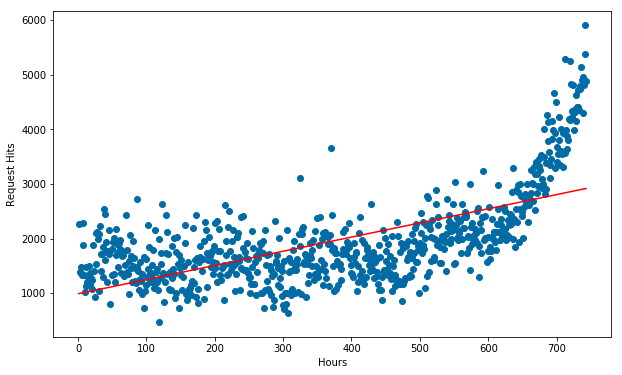

In [11]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_pred,color='r')
plt.xlabel('Hours')
plt.ylabel('Request Hits')

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [13]:
r2 = r2_score(y,y_pred)
mae = mean_absolute_error(y,y_pred)
mse = mean_squared_error(y,y_pred)

In [14]:
print('R_2: ', r2)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)

R_2:  0.41632369094258925
Mean Absolute Error:  504.8810103756525
Mean Squared Error:  431822.812707181


In [15]:
b1 = model.coef_
b0 = model.intercept_
print('Coefficient b1 = ', b1)
print('Intercept b0 = ', b0)


Coefficient b1 =  [2.59619213]
Intercept b0 =  989.0248710607153


In [16]:
x2 = np.concatenate((x,x**2),axis=1)
x3 = np.concatenate((x,x**2,x**3),axis=1)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
poly_2 = LinearRegression()
poly_3 = LinearRegression()

In [22]:
poly_2.fit(x2,y)
poly_3.fit(x3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
y_pred_poly2 = poly_2.predict(x2)
y_pred_poly3 = poly_3.predict(x3)

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [28]:
print("="*10+'Polynomial Regression Degree = 2'+"="*10+'\n')
r2_2 = r2_score(y,y_pred_poly2)
mae_2 = mean_absolute_error(y,y_pred_poly2)
mse_2 = mean_squared_error(y,y_pred_poly2)
print('R_2: ', r2_2)
print('Mean Absolute Error: ', mae_2)
print('Mean Squared Error: ', mse_2)
print('\n')
print("="*10+'Polynomial Regression Degree = 3'+"="*10+'\n')
r2_3 = r2_score(y,y_pred_poly3)
mae_3 = mean_absolute_error(y,y_pred_poly3)
mse_3 = mean_squared_error(y,y_pred_poly3)
print('R_2: ', r2_3)
print('Mean Absolute Error: ', mae_3)
print('Mean Squared Error: ', mse_3)

==========Polynomial Regression Degree = 2==========

R_2:  0.6690122985058977
Mean Absolute Error:  389.2663189980562
Mean Squared Error:  244875.52092269278


==========Polynomial Regression Degree = 3==========

R_2:  0.7437366099834488
Mean Absolute Error:  344.1036970490651
Mean Squared Error:  189592.0326962248
